## Analysis of factuality metric with Mistral
This notebook analyzes the results obtained for the **Factuality** metric applied to the Mistral model. It explores basic statistics and visualizations to understand how the scores behave.

## Data Loading
We load the JSON results file and convert it into a Pandas DataFrame for easier analysis.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [13]:
# Load data from the JSON file
with open('../results/factuality_results_mistral.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
df = pd.DataFrame(data)
df.head()

,question,model_answer,context,score,justification
0,In astronomy the concept of black bodies is ve...,"A black body, in astronomy, is an idealized th...",A black body is a theoretical object that abso...,1.0,The answer correctly and completely reflects t...
1,The International Space Station (ISS) circles ...,"27,622 kilometers per hour (or about 17,182 mi...",The International Space Station (ISS) orbits E...,0.5,The answer is explicitly stated in the context...
2,What drives differentiation?,Differentiation is driven by factors such as c...,Differentiation in products or services is dri...,0.5,The answer accurately reflects all the factors...
3,How have we been able to construct detailed ma...,We have constructed detailed maps of the surfa...,"Venus, often referred to as Earth's ""evil twin...",1.0,The answer is completely supported by the cont...
4,Which property of our solar system does a form...,A formation theory does NOT need to explain th...,The gravitational force between the planets in...,0.5,The answer accurately summarizes and affirms t...


## Descriptive Statistics
We calculate statistical values such as mean, median, standard deviation, and the min/max of each score type.

In [14]:
# Basic statistics on scores
score_cols = [col for col in df.columns if 'score' in col]
df[score_cols].describe()

,score
count,29.000000
mean,0.625000
std,0.229031
min,0.375000
25%,0.500000
50%,0.500000
75%,0.875000
max,1.000000


## Score Distribution Visualization
Histograms are generated to visualize how the values of each score are distributed.

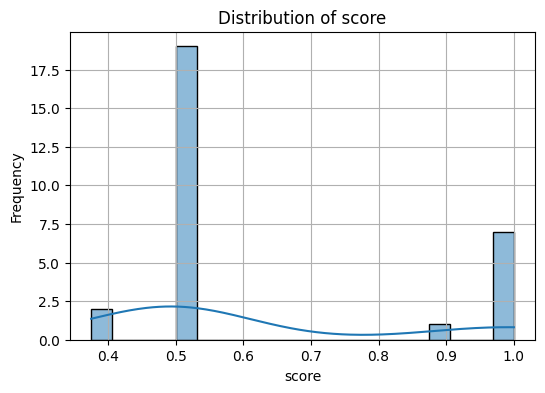

In [15]:
# Histogram of each score
for col in score_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## Automatic Distribution Analysis
This section interprets score distributions based on statistical thresholds to provide insights.

In [16]:
# Automatic analysis of distributions
for col in score_cols:
    mean_val = df[col].mean()
    std_val = df[col].std()
    min_val = df[col].min()
    max_val = df[col].max()
    print(f'--- {col} ---')
    print(f'Mean: {mean_val:.3f}, Std Dev: {std_val:.3f}')
    print(f'Range: {min_val:.3f} - {max_val:.3f}')
    if std_val < 0.1:
        print('-> Scores are highly concentrated. May indicate low variability.')
    elif std_val > 0.25:
        print('-> Good score dispersion. Variability is high.')
    if mean_val > 0.85:
        print('-> Most responses scored high.')
    elif mean_val < 0.5:
        print('-> Many responses scored low. Model performance may be questionable.')
    print()

--- score ---
Mean: 0.625, Std Dev: 0.229
Range: 0.375 - 1.000



# Five less factual responses 
To complement the quantitative analysis, we manually inspect some of the examples with the lowest **factuality_score**.  This helps identify specific cases where the model fails to adhere to the given context, either by hallucinating information or omitting relevant facts.

In [17]:
lowest_factual = df.sort_values(by='score').head(5)
for idx, row in lowest_factual.iterrows():
    print(f"--- Example {idx} ---")
    print(f"Factuality Score: {row['score']:.3f}")
    print(f"Answer: {row['model_answer']}")
    print(f"Context: {row['context']}")
    print("-" * 80)

--- Example 23 ---
Factuality Score: 0.375
Answer: Reproduction (in the context where animals remain in their original habitats to reproduce) is NOT usually a possible reason for migration.
Context: Among animals, one potential explanation for migration is seasonal reproduction requirements. While many species do migrate in search of mating and breeding opportunities, some animals may remain in their original habitats year-round to reproduce. Therefore, reproductive needs alone are not always a sufficient reason for migration. Other common causes of migration include finding food sources, avoiding harsh weather conditions, and escaping predators or competition for resources.
--------------------------------------------------------------------------------
--- Example 18 ---
Factuality Score: 0.375
Answer: 41% of Americans supported providing economic assistance to Japan, even if it meant food shortages for American citizens, according to a Gallup poll conducted just three months after t